#Difusion en Reactor Tubular
J. Camilo Alfonso R., Carlos M. Patiño

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Las ecuaciones que corresponden al reactor son:
$$c_t=-u(r)c_z+D(c_{zz}+c_{rr}+\frac{1}{r}c_r)-r(c,T)$$
$$T_t=-u(r)T_z+\frac{\lambda}{\rho c_p}(T_{zz}+T_{rr}+\frac{1}{r}T_r)+\frac{-\Delta H}{\rho c_p}r(c,t)$$

## En el centro del reactor
$$r=0$$
$$u(r=0)=u_{max}\left(1-\left(\frac{0}{R}\right)^2\right)=u_{max}$$
Los siguientes terminos se puede recalcular usando el teorema de L'Hopital
$$\lim_{r\rightarrow0}{\frac{c_r}{r}=\frac{0}{0}}\rightarrow \lim_{r\rightarrow0}{\frac{c_r}{r}}=\lim_{r\rightarrow0}{\frac{\delta c_r/ \delta r}{\delta r/ \delta r}}=c_r$$
$$\lim_{r\rightarrow0}{\frac{T_r}{r}=\frac{0}{0}}\rightarrow \lim_{r\rightarrow0}{\frac{T_r}{r}}=\lim_{r\rightarrow0}{\frac{\delta T_r/ \delta r}{\delta r/ \delta r}}=T_r$$


Asi, se obtienen las ecuaciones:
$$c_t(r=0)=-u_{max}c_z+D(c_{zz}+2c_{rr}+)-r(c,T)$$
$$T_t(r=0)=-u_{max}T_z+\frac{\lambda}{\rho c_p}(T_{zz}+2T_{rr}+)+\frac{-\Delta H}{\rho c_p}r(c,t)$$

## Planteamiento Diferencias Finitas
Las ecuaciones que corresponden al reactor son:
$$c_t=-u(r)c_z+D(c_{zz}+c_{rr}+\frac{1}{r}c_r)-r(c,T)$$
$$T_t=-u(r)T_z+\frac{\lambda}{\rho c_p}(T_{zz}+T_{rr}+\frac{1}{r}T_r)+\frac{-\Delta H}{\rho c_p}r(c,t)$$

Sabiendo que las derivadas se pueden discretizar de la forma:
$$u_{i,j}^{n}=u(t=n,z=i,r=j)$$
$$\frac{\delta u}{\delta t} = \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}$$
$$\frac{\delta^2u}{\delta x^2}=\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}$$

####Esquema Explicito
Se logra obtener el esquema explicito para $c_{i,j}^{n+1}$ y $T_{i,j}^{n+1}$
$$c_{i,j}^{n+1} = c_{i,j}^{n} -\frac{\Delta t}{\Delta z}u(r)(c_{i+1,j}^{n}-c_{i,j}^{n}) + D\Delta t \left(\frac{c_{i+1,j}^{n}-2c_{i,j}^{n}+c_{i-1,j}^{n}}{\Delta z^2} + \frac{c_{i,j+1}^{n}-2c_{i,j}^{n}+c_{i,j-1}^{n}}{\Delta r^2} + \frac{c_{i,j+1}^{n}-c_{i,j}^{n}}{r\Delta r}\right)-r\left(c_{i,j}^{n},T_{i,j}^{n}\right)$$

$$T_{i,j}^{n+1} = T_{i,j}^{n} -\frac{\Delta t}{\Delta z}u(r)(T_{i+1,j}^{n}-T_{i,j}^{n}) + \Delta t\frac{\lambda}{\rho c_p} \left(\frac{T_{i+1,j}^{n}-2T_{i,j}^{n}+T_{i-1,j}^{n}}{\Delta z^2} + \frac{T_{i,j+1}^{n}-2T_{i,j}^{n}+T_{i,j-1}^{n}}{\Delta r^2} + \frac{T_{i,j+1}^{n}-T_{i,j}^{n}}{r\Delta r}\right)+\Delta t\frac{-\Delta H}{\rho c_p}r\left(c_{i,j}^{n},T_{i,j}^{n}\right)$$

####Descripcion del sistema
Condiciones iniciales
$$c(z,r,0)=c_0(z,r)$$
$$T(z,r,0)=T_0(z,r)$$

Simetria Radial sin Transferencia de Masa
$$c_r(z,0,t)=\frac{c_{i,0+1}^{n}-c_{i,0}^{n}}{\Delta r}=0$$
$$\rightarrow c_{i,0}^{n}=c_{i,1}^{n}$$

$$T_r(z,0,t)=\frac{T_{j,0+1}^{n}-T_{j,0}^{n}}{\Delta r}=0$$
$$\rightarrow T_{j,0}^{n}=T_{j,1}^{n}$$

$$c_r(z,R,t)=\frac{c_{j,R}^{n}-c_{j,R-1}^{n}}{\Delta r}=0$$
$$\rightarrow c_{j,R}^{n}=c_{j,R-1}^{n}$$

Intercambio termico con la pared
$$T_r(z,R,t)=\frac{T_{j,R}^{n}-T_{j,R-1}^{n}}{\Delta r}=\frac{h}{\lambda}(T_w-T(z,R,t))$$
$$\rightarrow T_{i,R}^{n}=T_{i,R-1}^{n}+\Delta r \frac{h}{\lambda}(T_w-T_{i,R}^{n})$$

Concentracion y Temperatura constantes al **inicio** del tubo
$$c(0,r,t)=c_{0,j}^{n}=c_{in}$$
$$T(0,r,t)=T_{0,j}^{n}=T_{in}$$

Difusion cero a la salida
$$c_z(L,r,t)=\frac{c_{L,r}^{n}-c_{L-1,r}^{n}}{\Delta z}=0$$
$$\rightarrow c_{L,r}^{n} = c_{L-1,r}^{n}$$

$$T_z(L,r,t)=\frac{T_{L,i}^{n}-T_{L-1,i}^{n}}{\Delta z}=0$$
$$\rightarrow T_{L,r}^{n} = T_{L-1,r}^{n}$$

##Implementacion Diferencias Finitas
###Definir Parametros del problema

In [148]:
u_max = 0.005   # Velocidad en el centro del tubo

# Discretizacion del problema
nz = 15
z = linspace(0,30,nz)
dz = z[1]-z[0]

Rr = 1 # radio del reactor
nr = 15
r = linspace(Rr/(50+1),Rr,nr) # No inicio r en cero para evitar dividir entre cero
dr = r[1] - r[0]

dt = 1e-3 # Delta de tiempo

c0 = 0.5   # Concetracion en z=0 mol/L
T0 = 20    # Temperatura en z=0 °c

zz,rr = meshgrid(z,r,sparse=False) # Malla
print(dt,dz,dt/dz)

0.001 2.14285714286 0.000466666666667


###Funciones

In [144]:
def U_(r):
    # Velocidad en funcion del radio
    return u_max*(1-(r/Rr)**2)
#Verificar funcion u(r)
#r = linspace(-R,R,20)
#plot(r,U_(r))
# Funcion Verificada!


k0 = 10 # Parametro en enunciado
E = 10  # Parametro en enunciado
R = 8.31 # Revisar si el R corresponde al radio o a constante de gases
def F_r(c,T):
    return k0*exp(-E/(R*T))*c**2
    # Verificar si el 'R' de la ecuacion es el R_max del tubo o si es R constante de los gases

def Estado_inicial(zz,rr):
    c = ones(shape(zz))*c0/20*(1-rr) # Condicion inicial arbitraria
    c[:,0] = c0
    T = ones(shape(zz))*T0/4*(1-rr)
    T[:,0] = T0
    return c,T
    
    
def is_laminar(rho, mu, v_mean, d):
    # Calcula el numero de Reynolds para el flujo definido por:
    # Densidad rho, Viscocidad mu, Velocidad media v_mean, confinado en tubo de diametro d
    # Retorna True o False
    Reynolds = rho*v_mean*d/mu
    if Reynolds < 2300:
        return True,round(Reynolds)
    else: 
        return False,round(Reynolds)
    
def cond_frontera(c,T):
    # Aplicar Condiciones de Frontera
    # Simetria Radial sin transferencia de Masa
    c[0,:] = c[1,:]
    T[0,:] = T[1,:]
    c[-1,:] = c[-2,:]
    
    # Intercambio Termico en la pared
    T_w = 10
    T[-1,:] = T[-2,:] + 0.4*(T_w-T[-1,:])

    # Concentracion y Temperatura constantes al inicio del tubo
    c[:,0] = c0
    T[:,0] = T0

    # Difusion cero a la salida
    c[:,-1] = c[:,-2]
    T[:,-1] = T[:,-2]

    return c,T
def grafica(c,T):
    figure(figsize=(17,3))
    subplot(1,2,1); pcolor(zz,rr,c); colorbar(); title('concentracion [mol/L]'); xlabel('z[m]'); ylabel('r[m]'); grid()
    subplot(1,2,2); pcolor(zz,rr,T); colorbar(); title('Temperatura [°k]'); xlabel('z[m]'); ylabel('r[m]'); grid()

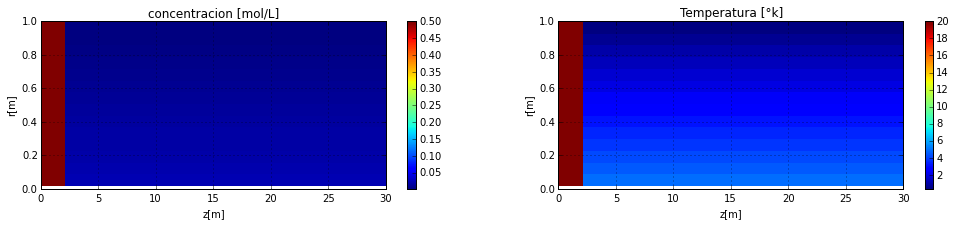

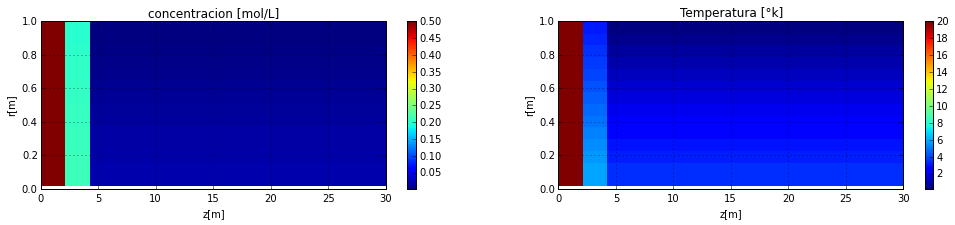

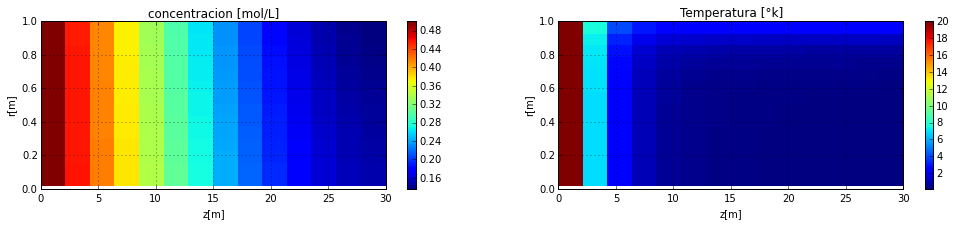

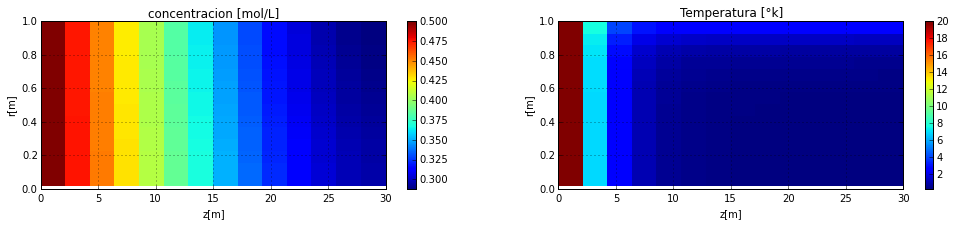

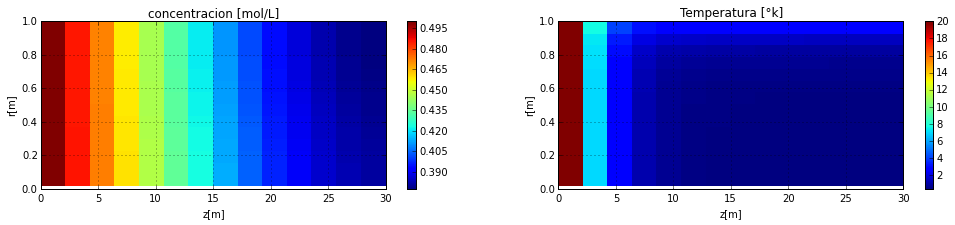

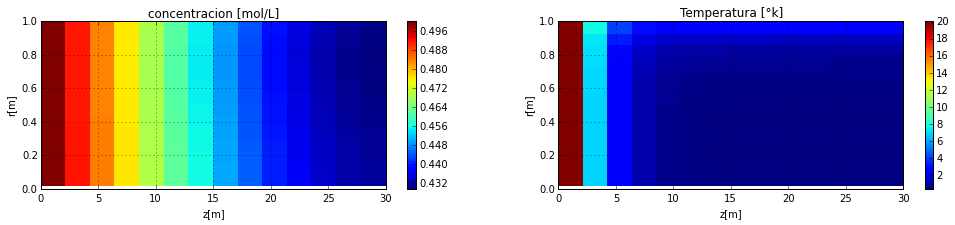

In [156]:
a1 = -0.0004
a2 = 0.4
a3 = 0.00001
b2 = 0.15
b3 = -0.00005

a4 = 0.002
a5 = 0.0001
b4 = 0.2
b5 = 0.01
# Rango de los datos que se calculan
i = 1; ni = nz-1
j = 1; nj = nr-1

nt = 500
c,T = Estado_inicial(zz,rr)
grafica(c,T)
for t in range(nt):
    cn = c.copy()
    Tn = T.copy()
    
    # Variaciones en z
    c[j:nj,i:ni] = cn[j:nj,i:ni]*(1+a1*U_(rr[j:nj,i:ni])-2*a2) + cn[j:nj,i-1:ni-1]*(-a1*U_(rr[j:nj,i:ni])+a2) + cn[j:nj,i+1:ni+1]*a2 + a3*F_r(cn[j:nj,i:ni],Tn[j:nj,i:ni])   
    T[j:nj,i:ni] = Tn[j:nj,i:ni]*(1+a1*U_(rr[j:nj,i:ni])-2*b2) + Tn[j:nj,i-1:ni-1]*(-a1*U_(rr[j:nj,i:ni])+b2) + Tn[j:nj,i+1:ni+1]*b2 + b3*F_r(cn[j:nj,i:ni],Tn[j:nj,i:ni])
    
    # Variaciones en r
    c[j:nj,i:ni] = c[j:nj,i:ni] + cn[j:nj,i:ni]*(-2*a4-a5/rr[j:nj,i:ni]) + cn[j+1:nj+1,i:ni]*(a4+a5/rr[j:nj,i:ni]) + cn[j-1:nj-1,i:ni]*(a4)
    T[j:nj,i:ni] = T[j:nj,i:ni] + Tn[j:nj,i:ni]*(-2*b4-b5/rr[j:nj,i:ni]) + Tn[j+1:nj+1,i:ni]*(b4+b5/rr[j:nj,i:ni]) + cn[j-1:nj-1,i:ni]*(b4)
    
    c,T = cond_frontera(c,T)
    
    if(t%100==0):
        grafica(c,T)

###Comentarios Importantes
Se implementa diferencias finitas en sentido _backwards_ para _z_ y en sentido _forward_ para _r_. El esquema explicito mostrado al princiipo sigue una deduccion _forward_ en ambas dimensiones. Este esquema tiene pequeñas diferencias respecto al esquema implementado.

Dado que el modelo fisico esta planteado para condiciones de flujo laminar, se implementa una funcion para verificar las condiciones de flujo laminar acorde a referencias: _Fluid Mechanics, White_

La simulacion es altamente sensible a los parametros **a1,a2,a3,a4,a5,b2,b3,b4,b5**

Esta implementacion logra mostrar variaciones para la temperatura y la concentracion en todas las dimensiones a analizar: **tiempo, z, r**. Las variaciones para **r** en la concentracion no presentan magnitudes suficientemente amplias para ser visibles en la barra de colores, sin embargo las variaciones se calculan. Para observar mejor estas variaciones puede cambiar los parametros **a4** y **a5** ligeramente y simular para pocos pasos en el tiempo.

En general, se logra una simulacion estable para un alto numero de pasos en el tiempo.
####Referencias
[Forero-PDE](http://nbviewer.ipython.org/github/forero/ComputationalMethods/blob/master/notes/11.PDEs/PDE.ipynb)

## Sentido Fisico de las Constantes

####Esquema Explicito
Se logra obtener el esquema explicito para $c_{i,j}^{n+1}$ y $T_{i,j}^{n+1}$
$$c_{i,j}^{n+1} = c_{i,j}^{n} -\frac{\Delta t}{\Delta z}u(r)(c_{i+1,j}^{n}-c_{i,j}^{n}) + D\Delta t \left(\frac{c_{i+1,j}^{n}-2c_{i,j}^{n}+c_{i-1,j}^{n}}{\Delta z^2} + \frac{c_{i,j+1}^{n}-2c_{i,j}^{n}+c_{i,j-1}^{n}}{\Delta r^2} + \frac{c_{i,j+1}^{n}-c_{i,j}^{n}}{r\Delta r}\right)-r\left(c_{i,j}^{n},T_{i,j}^{n}\right)$$

$$T_{i,j}^{n+1} = T_{i,j}^{n} -\frac{\Delta t}{\Delta z}u(r)(T_{i+1,j}^{n}-T_{i,j}^{n}) + \Delta t\frac{\lambda}{\rho c_p} \left(\frac{T_{i+1,j}^{n}-2T_{i,j}^{n}+T_{i-1,j}^{n}}{\Delta z^2} + \frac{T_{i,j+1}^{n}-2T_{i,j}^{n}+T_{i,j-1}^{n}}{\Delta r^2} + \frac{T_{i,j+1}^{n}-T_{i,j}^{n}}{r\Delta r}\right)+\Delta t\frac{-\Delta H}{\rho c_p}r\left(c_{i,j}^{n},T_{i,j}^{n}\right)$$

$$a1 = -\frac{\Delta t}{\Delta z}$$
$$a2 = D\frac{\Delta t}{\Delta z^2}$$
$$a3 = D\frac{\Delta t}{\Delta r^2}$$
$$b2 = \frac{\lambda}{\rho c_p}\frac{\Delta t}{\Delta z^2}$$

In [159]:
a1 = -0.004
print(dt,dz,dt/dz,a1)

a2 = 0.4
D = a2*dz**2/dt
print(dt/(dz**2),a2,D)

a3 = 0.00001

b2 = 0.15
l_r_c = dz**2*b2/dt
print(l_r_c,0.58/(998*4.183e-3))
# lambda es la conductividad termica del fluido
# rho es la densidad
# cp es el calor especifico

b3 = -0.00005

a4 = 0.002
a5 = 0.0001
b4 = 0.2
b5 = 0.01

0.001 2.14285714286 0.000466666666667 -0.004
0.000217777777778 0.4 1836.73469388
688.775510204 0.13893433532137187


##Intentos Fallidos

In [403]:
# Parametros (Unidades en Sistema internacional)
T_in = 20+273  # Temperatura a la entrada del Reactor
c_in = 0.5     # Concentracion a la entrada

h = 1   # Intercambio termico en la pared
h2 = 1  #
T_w = 100 #

D = 1 # 
rho = 1000 # Densidad del fluido (Agua)
c_p = 4181.3 # Calor especifico del agua a 298 °K [J/gK]
mu = 1.0e-3  # Viscocidad del agua

Delta_H = -1*1.0; # Entalpia de la reaccion
u_max = 0.05; # Velocidad maxima del fluido
R = 0.02;     # Radio Maximo

n_t = 100 # Numero de pasos en el tiempo
t_f = 1  # tiempo final
t = linspace(0,t_f,n_t) # vector de tiempo
d_t = t[1]-t[0] # paso de tiempo
# Falta tener en cuenta las condiciones de convergencia ***

n_r = 10
r = linspace(1e-2,R,n_r) # El radio solo se evalua en la parte psotiva porque el comportamiento de las funciones respecto 
                        # al radio es simetrico
d_r = r[1] - r[0]

n_z = 50
L = 30 # Longitud del tubo
z = linspace(0,L,n_z)
d_z = z[1]-z[0]

k0 = 10 # parametro
E = 10 # parametro

zz,rr = meshgrid(z,r,sparse=False) # Malla

In [ ]:
c,T = solver(60,zz,rr)
pcolor(zz,rr,T); colorbar()

In [ ]:
#v_mean = sum(U_(r)*d_r)/R
v_mean = sum(U_(r)*d_r)/R
print(v_mean)
rta,Reynolds = is_laminar(rho, mu, v_mean, 2*R)
print(rta,Reynolds)

In [ ]:
def solver(nt,zz,rr):
    # c,T = solver(nt)
    # Resuelve ecuaciones de concentracion c y temperatura T para el reactor
    # discretizado en posiciones zz y rr 
    #
    c = c_t0(zz,rr)
    T = T_t0(zz,rr)
    
    for i in range(nt+1):
        cn = c.copy()
        Tn = T.copy()

        # Los valores de los bordes se calculan con condiciones de frontera
        c0 = cn[1:-1,1:-1]
        c1 = -d_t/d_z*U_(rr[1:-1,1:-1])*(cn[1:-1,2:] - cn[1:-1,1:-1])
        c2 = (cn[1:-1,2:] - 2*cn[1:-1,1:-1] + cn[1:-1,0:-2])/d_z**2
        c3 = (cn[2:,1:-1] - 2*cn[1:-1,1:-1] + cn[0:-2,1:-1])/d_r**2
        c4 = (cn[2:,1:-1] - cn[1:-1,1:-1])/(d_r*rr[1:-1,1:-1])
        c5 = -F_r(cn[1:-1,1:-1], Tn[1:-1,1:-1])
        c[1:-1,1:-1] = c0 + c1 + D*d_t*(c2+c3+c4) + c5

        # Los valores de los bordes se calculan con condiciones de frontera
        T0 = Tn[1:-1,1:-1]
        T1 = -d_t/d_z*U_(rr[1:-1,1:-1])*(Tn[1:-1,2:] - Tn[1:-1,1:-1])
        T2 = (Tn[1:-1,2:] - 2*Tn[1:-1,1:-1] + Tn[1:-1,0:-2])/d_z**2
        T3 = (Tn[2:,1:-1] - 2*Tn[1:-1,1:-1] + Tn[0:-2,1:-1])/d_r**2
        T4 = (Tn[2:,1:-1] - Tn[1:-1,1:-1])/(d_r*rr[1:-1,1:-1])
        T5 = d_t*Delta_H/(rho*c_p)*F_r(cn[1:-1,1:-1], Tn[1:-1,1:-1])
        T[1:-1,1:-1] = T0 + T1 + d_t*h2/(rho*c_p)*(T2+T3+T4) + T5

        # Aplicar Condiciones de Frontera
        # Simetria Radial sin transferencia de Masa
        c[0,:] = c[1,:]
        T[0,:] = T[1,:]
        c[-1,:] = c[-2,:]
        # Intercambio Termico en la pared
        T[-1,:] = T[-2,:] + d_r*h/h2*(T_w-T[-1,:])

        # Concentracion y Temperatura constantes al inicio del tubo
        c[:,0] = c_in
        T[:,0] = T_in

        # Difusion cero a la salida
        c[:,-1] = c[:,-2]
        T[:,-1] = T[:,-2]
    return c,T